In [174]:
import numpy as np 


In [175]:
import pandas as pd
from sklearn.tree import export_graphviz 

In [176]:
dt=pd.read_csv('titanic.csv')

In [177]:
dt.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [178]:
dt.shape

(887, 8)

In [179]:
dt.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [180]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [181]:
dt.Age=dt.Age.astype(int)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    int32  
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.1+ KB


In [182]:
#Discretizar columa Sexo
dt.Sex.replace(['male','female'],[1,0],inplace=True)

In [183]:
dt=dt.drop(['Name'],axis=1)

In [184]:
nomCol=dt.columns.values.tolist()
predictores=nomCol[1:]
objetivo=nomCol[0]

In [185]:
dt['entrenamiento']=np.random.uniform(0,1,len(dt))<=0.75

In [186]:
dt.replace([True,False],[1,0],inplace=True)

In [187]:
import matplotlib.pyplot as plt

(array([222.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 665.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

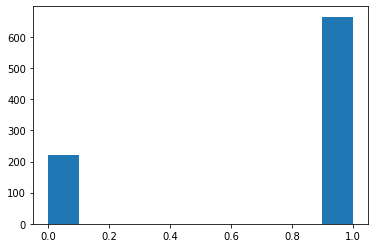

In [188]:
plt.hist(dt.entrenamiento)

In [189]:
entrena, prueba=dt[dt.entrenamiento==1],dt[dt.entrenamiento==0]

## Prediccion

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
arbol=DecisionTreeClassifier(criterion='entropy',min_samples_split=4, max_depth=4)
arbol.fit(entrena[predictores],entrena[objetivo])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [192]:
predice=arbol.predict(prueba[predictores])

In [193]:
res=pd.crosstab(prueba[objetivo], predice, rownames=["Actual"], colnames=["Predictions"],margins=True)
res

Predictions,0,1,All
Actual,,,
0,124,14,138
1,25,59,84
All,149,73,222


In [194]:
(res[0][0]+res[1][1])/221

0.8280542986425339

In [195]:
(29+14)/231

0.18614718614718614

## Visualizacion


In [196]:
from sklearn.tree import export_graphviz


In [197]:
with open("Graf_Arbol.dot","w") as dotfile:
    export_graphviz(arbol, out_file=dotfile,feature_names=predictores)
    dotfile.close()

In [198]:
import os 
from graphviz import Source

In [199]:
file =open("Graf_Arbol.dot","r")
texto=file.read()
texto

'digraph Tree {\nnode [shape=box] ;\n0 [label="Sex <= 0.5\\nentropy = 0.963\\nsamples = 665\\nvalue = [407, 258]"] ;\n1 [label="Pclass <= 2.5\\nentropy = 0.81\\nsamples = 241\\nvalue = [60, 181]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Age <= 2.5\\nentropy = 0.297\\nsamples = 133\\nvalue = [7, 126]"] ;\n1 -> 2 ;\n3 [label="entropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n2 -> 3 ;\n4 [label="Fare <= 28.856\\nentropy = 0.268\\nsamples = 131\\nvalue = [6, 125]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.445\\nsamples = 54\\nvalue = [5, 49]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.1\\nsamples = 77\\nvalue = [1, 76]"] ;\n4 -> 6 ;\n7 [label="Fare <= 23.35\\nentropy = 1.0\\nsamples = 108\\nvalue = [53, 55]"] ;\n1 -> 7 ;\n8 [label="Age <= 36.0\\nentropy = 0.965\\nsamples = 87\\nvalue = [34, 53]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.927\\nsamples = 79\\nvalue = [27, 52]"] ;\n8 -> 9 ;\n10 [label="entropy = 0.544\\nsamples = 8\\nvalue = [7, 1]"] ;\n8 -> 10 ;\n11 [label="

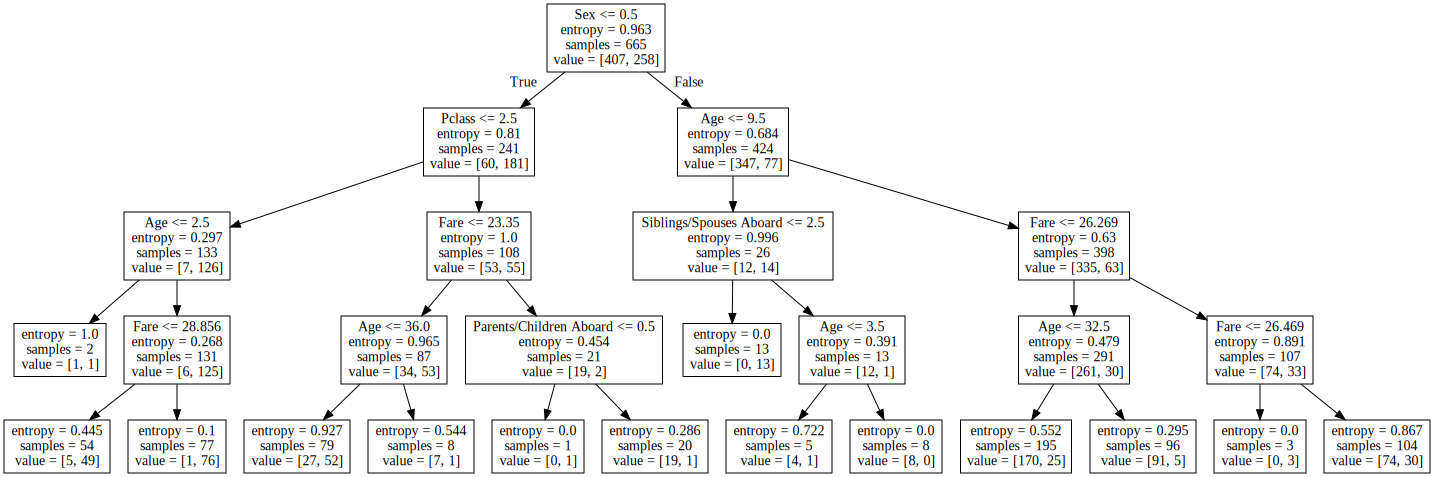

In [200]:
Source(texto)

## Valdiacion Cruzada para la poda


In [201]:
a=dt[predictores]
b=dt[objetivo]

In [202]:
arbol=DecisionTreeClassifier(criterion="entropy", max_depth=5,min_samples_split=20,random_state=99)
arbol.fit(a,b)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [203]:
from sklearn.model_selection import KFold

In [204]:
vc=KFold(n_splits=10, shuffle=True, random_state=1)

In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
scores = cross_val_score(arbol, a, b, scoring="accuracy", cv = vc, n_jobs=1)
scores

array([0.86516854, 0.83146067, 0.76404494, 0.83146067, 0.76404494,
       0.84269663, 0.92134831, 0.72727273, 0.90909091, 0.89772727])

In [208]:
scores=np.mean(scores)
scores

0.8354315628192033

In [211]:
for i in range(1,11):
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    arbol.fit(a,b)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(arbol, a, b, scoring="accuracy", cv = vc, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    
    #GAnancia de informacion, importancia del rasgo
    print("   ",arbol.feature_importances_)

Score para i =  1  es de  0.7858273748723187
    [0. 1. 0. 0. 0. 0.]
Score para i =  2  es de  0.75755873340143
    [0.22939488 0.69117067 0.07943445 0.         0.         0.        ]
Score para i =  3  es de  0.8162921348314607
    [0.17972861 0.54152537 0.0622361  0.08179475 0.         0.13471517]
Score para i =  4  es de  0.8365551583248212
    [0.16315564 0.49159071 0.10475834 0.07425237 0.01878509 0.14745787]
Score para i =  5  es de  0.8354315628192033
    [0.15288591 0.46064786 0.13843393 0.0695786  0.02422301 0.15423069]
Score para i =  6  es de  0.8332226762002044
    [0.14698225 0.44286003 0.15737128 0.06689184 0.02328764 0.16260695]
Score para i =  7  es de  0.8240934627170582
    [0.14020649 0.42244455 0.16478798 0.06380818 0.03200866 0.17674414]
Score para i =  8  es de  0.8263789581205311
    [0.13718575 0.40702796 0.16796465 0.06147958 0.03084054 0.19550152]
Score para i =  9  es de  0.8185010214504598
    [0.13177172 0.3909646  0.19502233 0.05905329 0.02962342 0.1935646

In [212]:
predictores

['Pclass',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']